In [37]:
import pandas as pd
import json
f=open("example.txt")
a=f.readlines()
print(a[0])
import numpy as np

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [40]:
b=[json.loads(i) for i in a]
print(b[0])

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}


In [41]:
timezones=[rec['tz'] for rec in b if 'tz' in rec]

In [54]:
print(timezones[:10])

['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '']


In [55]:
def getCount(sequence):
    count={}
    for i in sequence:
        if i in count:
            count[i]+=1
        else:
            count[i]=1
    return count     

In [56]:
count=getCount(timezones)

In [57]:
print(count)

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

In [67]:
def top_ten(counts):
    value_key=[(count,tz) for tz,count in counts.items()]
    value_key.sort()
    return value_key[-10:]


In [68]:
top_ten(count)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [70]:
import pandas as pd

frame=pd.DataFrame(b)

In [71]:
display(frame)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [74]:
cleantz=frame['tz'].fillna('Missing')

In [75]:
cleantz[cleantz=='']='Unknown'
tz_counts=cleantz.value_counts()

<AxesSubplot:>

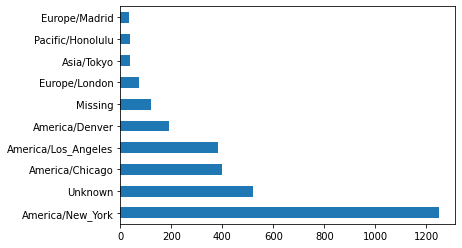

In [78]:
tz_counts[:10].plot(kind='barh',rot=0)

In [102]:
res=pd.Series([x.split() for x in frame.a.dropna()])

In [105]:
print(res[2])

['Mozilla/4.0', '(compatible;', 'MSIE', '8.0;', 'Windows', 'NT', '6.1;', 'WOW64;', 'Trident/4.0;', 'SLCC2;', '.NET', 'CLR', '2.0.50727;', '.NET', 'CLR', '3.5.30729;', '.NET', 'CLR', '3.0.30729;', 'Media', 'Center', 'PC', '6.0;', '.NET4.0C;', '.NET4.0E;', 'InfoPath.3)']


In [83]:
frame.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
                              ...                        
3555    Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557                               GoogleMaps/RochesterNY
3558                                       GoogleProducer
3559    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, Length: 3560, dtype: object

In [85]:
res.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
BlackBerry8520/5.0.0.592                                3
Dalvik/1.4.0                                            3
Goldfire                                                2
Acoon                                                   2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
sometrik.com                                            1
Vodafone/1.0/LG-KU990i/V10c                             1
BlackBerry8530/5.0.0.654                                1
Vancouver     

In [98]:
res=pd.Series([x.split()[0] for x in frame.a.dropna()])
cframe=frame[frame.a.notnull()]

In [100]:
opsy=np.where(cframe.a.str.contains('Windows'),'Windows','Notwindows')

In [106]:
print(opsy[:5])

['Windows' 'Notwindows' 'Windows' 'Notwindows' 'Windows']


In [107]:
by_tz_os=cframe.groupby(['tz',opsy])

In [111]:
data={ i: np.random.randn() for i in range(7)}

In [112]:
print(data)

{0: 1.038403340178445, 1: -0.12010313661316474, 2: 0.5976373988423459, 3: -0.7554888811980954, 4: 0.2600510766767717, 5: -0.4367121297961449, 6: 0.4797231301327558}


In [115]:
data?

In [120]:
a=np.random.randn(100,100)
%timeit np.dot(a,a)

100 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [121]:
import numpy as np

In [122]:
my_ar=np.arange(10000)

In [123]:
print(my_ar)

[   0    1    2 ... 9997 9998 9999]


In [124]:
data=np.random.randn(2,3)

In [125]:
print(data)

[[ 1.45539943 -0.36721214  0.92413606]
 [-1.02681926 -0.23102348 -0.6714809 ]]


In [127]:
print(type(data))

<class 'numpy.ndarray'>


In [128]:
np.random.randn(3,4)

array([[ 0.39796584, -0.49769389, -1.24178952,  0.31773605],
       [-2.31929384, -0.17043699, -0.8418401 ,  0.47486973],
       [-1.35031953, -1.16662574,  0.63354499, -1.54488154]])

In [129]:
data.dtype

dtype('float64')

In [149]:
np.zeros((10,10),dtype="bool")

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [152]:
a=np.array(['1.2','3.4','5.6'],dtype="str")

In [157]:
#astype is used to convert the datatype!!!!!!!!!!!!!!!!!!!!!!!!!!
a.astype("float64")

array([1.2, 3.4, 5.6])

In [163]:
a=np.random.randn(3,3)
print(a**-1)

[[-0.94233674  6.22194522 -1.36152339]
 [ 1.59217578 -0.73403606  1.27251017]
 [ 1.7326395  -1.88323818 -2.30266219]]


In [167]:
ar=np.array([1,2,3,4,5,66,7,66666,7777,888])
sl=ar[5:]

In [168]:
print(sl)

[   66     7 66666  7777   888]


In [170]:
ar


array([    1,     2,     3,     4,     5,    66,     7, 66666,  7777,
         888])

In [182]:
a=np.array([
    [[1,2,3],[1,2,3],[1,2,3]],
    [[np.random.randn(1,2)],[1,2,3],[1,2,3]]
]
)

C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_4948/1847181396.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a=np.array([


In [183]:
a.ndim

2

In [221]:
a=np.random.randn(7,7)

In [222]:
a

array([[ 0.62255947,  0.3623456 ,  0.36465007,  0.91993031,  0.04352061,
        -0.05519238,  0.63290778],
       [ 0.74979049, -1.67233392,  0.53201333,  1.04603031, -0.65234611,
        -2.27951587, -1.38729171],
       [ 0.89906725, -1.10470683,  0.08207236,  0.78379236, -0.22076387,
        -1.36322755,  0.05189733],
       [-0.18183494,  1.66637645, -1.19866194, -0.63022381,  0.60989896,
        -0.45561787, -0.04020325],
       [ 0.83527864,  2.10664367,  0.18481989,  1.15979945, -0.14719514,
        -0.03336072, -0.35351703],
       [-0.2625662 ,  2.44797235, -0.96334881, -0.13314387,  0.3910749 ,
         0.06159786,  1.30787625],
       [-1.50631764,  0.13755601,  0.18445308,  1.54810565,  0.09411945,
        -0.69137703, -0.49497318]])

In [223]:
b=np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [224]:
b=='Bob'

array([ True, False, False,  True, False, False, False])

In [226]:
a[b!='Bob']

array([[ 0.74979049, -1.67233392,  0.53201333,  1.04603031, -0.65234611,
        -2.27951587, -1.38729171],
       [ 0.89906725, -1.10470683,  0.08207236,  0.78379236, -0.22076387,
        -1.36322755,  0.05189733],
       [ 0.83527864,  2.10664367,  0.18481989,  1.15979945, -0.14719514,
        -0.03336072, -0.35351703],
       [-0.2625662 ,  2.44797235, -0.96334881, -0.13314387,  0.3910749 ,
         0.06159786,  1.30787625],
       [-1.50631764,  0.13755601,  0.18445308,  1.54810565,  0.09411945,
        -0.69137703, -0.49497318]])

In [235]:
a[a<0]=0

In [236]:
a

array([[0.62255947, 0.3623456 , 0.36465007, 0.91993031, 0.04352061,
        0.        , 0.63290778],
       [0.74979049, 0.        , 0.53201333, 1.04603031, 0.        ,
        0.        , 0.        ],
       [0.89906725, 0.        , 0.08207236, 0.78379236, 0.        ,
        0.        , 0.05189733],
       [0.        , 1.66637645, 0.        , 0.        , 0.60989896,
        0.        , 0.        ],
       [0.83527864, 2.10664367, 0.18481989, 1.15979945, 0.        ,
        0.        , 0.        ],
       [0.        , 2.44797235, 0.        , 0.        , 0.3910749 ,
        0.06159786, 1.30787625],
       [0.        , 0.13755601, 0.18445308, 1.54810565, 0.09411945,
        0.        , 0.        ]])

In [238]:
a[:(b='Joe')]

SyntaxError: invalid syntax (Temp/ipykernel_4948/754427802.py, line 1)

In [247]:
arr=np.arange(32).reshape(4,-3)

array([[    0,     1,     8,    27,    64,   125,   216,   343],
       [  512,   729,  1000,  1331,  1728,  2197,  2744,  3375],
       [ 4096,  4913,  5832,  6859,  8000,  9261, 10648, 12167],
       [13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791]],
      dtype=int32)

In [254]:
arr=np.random.randn(7)*5

In [255]:
arr

array([-7.27272387, -8.89794609, -1.93065407,  5.44484202, -1.84243223,
       -8.92894325,  1.1880349 ])

In [256]:
a1,a2=np.modf(arr)

In [261]:
a1,a2

(array([-0.27272387, -0.89794609, -0.93065407,  0.44484202, -0.84243223,
        -0.92894325,  0.1880349 ]),
 <function numpy.array>)

In [262]:
np.sqrt(a2,a2)

TypeError: return arrays must be of ArrayType

In [264]:
a=np.ceil(a1)

In [265]:
a

array([-0., -0., -0.,  1., -0., -0.,  1.])

In [266]:
points=np.arange(-5,5,0.01)

In [267]:
xs,ys=np.meshgrid(points,points)

In [270]:
z=np.sqrt(xs**2+ys**2)

In [271]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

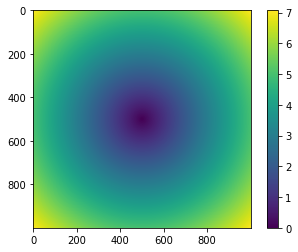

In [276]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap='viridis')
plt.colorbar()

In [277]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

a=xarr[cond]



In [279]:
np.where(cond,xarr,yarr)#if cond choose xarr else yarr

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [284]:
x=np.where(cond,2,3)

In [285]:
x

array([2, 3, 2, 2, 3])

In [289]:
x=np.random.randn(5,5)
print(x)
m=np.where(cond,x,yarr)

[[ 1.59748366 -0.48550247  0.90586749  0.38119394 -1.95508024]
 [ 2.24778628  1.04246858  0.66839472 -1.08695527 -0.83381315]
 [ 1.96254955 -1.1671902  -0.35898619 -0.24086063  1.25537563]
 [-0.6295521   0.31649609 -0.87764698  0.18452229  0.95461809]
 [-0.0306259  -0.48034799  1.16074549  0.54012243  1.22580453]]


In [291]:
m#if cond then choose the row in x else choose the val in yarr at that condition

array([[ 1.59748366,  2.2       ,  0.90586749,  0.38119394,  2.5       ],
       [ 2.24778628,  2.2       ,  0.66839472, -1.08695527,  2.5       ],
       [ 1.96254955,  2.2       , -0.35898619, -0.24086063,  2.5       ],
       [-0.6295521 ,  2.2       , -0.87764698,  0.18452229,  2.5       ],
       [-0.0306259 ,  2.2       ,  1.16074549,  0.54012243,  2.5       ]])

In [299]:
arr=np.random.randn(4,3)
print(arr)

print("axis 1",arr.sum(1))
print("acis 0",arr.sum(0))

[[-0.94997574 -0.31371593  0.45588127]
 [ 0.7282646   0.31828531  0.54873569]
 [ 0.63354742  1.6562184  -0.18147401]
 [-1.68452057  2.7054653   1.10724184]]
axis 1 [-0.8078104   1.5952856   2.10829182  2.12818657]
acis 0 [-1.27268429  4.36625308  1.93038479]


In [314]:
arr=np.random.randn(4,4)*7
print(arr)
np.argmax(arr,0)

[[10.90082713 -8.28632715  0.50267724 -2.009822  ]
 [ 4.76062646  9.60368659 11.21498062  2.3810809 ]
 [18.26654366  3.94845137  2.28944196 -3.36333462]
 [-1.06078898  4.73545442 -0.93254792 -2.79021989]]


array([2, 1, 1, 1], dtype=int64)

In [315]:
np.argmax(arr,1)

array([0, 2, 0, 1], dtype=int64)

In [316]:
arr=np.random.randn(100)
(arr>0).sum()

46

In [317]:
arr

array([-0.3462057 , -2.48982132,  1.61346498, -0.8171709 ,  0.48788776,
       -0.73374657, -1.49063774, -0.45529091, -1.2061311 , -0.70968886,
        0.24384571, -1.88706972, -0.30932129,  0.3154114 ,  1.05227435,
        0.31796906, -1.39171886, -1.02026074, -1.04736626,  0.53812608,
       -0.61420586, -0.23268917,  0.30120496,  0.44321625, -0.13834687,
       -1.32524845,  0.82609609,  0.51343479, -0.22275128, -0.59890721,
        0.17305337, -1.69876649,  2.74858783,  0.46278649, -0.79004306,
        0.07811052, -0.98737596,  0.96978111,  1.04109623,  0.04607642,
        0.79473936,  1.39268421, -1.08433132, -0.78191801,  1.53896478,
       -0.45836508, -0.62827824,  1.65406825, -0.21634674, -0.17899447,
        2.22408373, -2.11169886,  1.41200283,  0.76980835,  0.30661682,
       -0.30403487, -0.18512355,  1.96300069,  0.47032509, -1.0493672 ,
        0.67462747, -0.05600175, -0.07798879, -1.19663945, -1.27161599,
       -0.26614437, -1.04989374, -0.70508581,  0.0766592 ,  1.37

In [321]:
arr=arr.reshape(10,10)

In [326]:
arr.sort(0)#axis 0 i.e rows 1 is columns


In [327]:
arr

array([[-2.48982132, -2.11169886, -1.88706972, -1.69876649, -1.49063774,
        -1.39171886, -1.32524845, -1.27161599, -1.20881727, -1.2061311 ],
       [-1.19663945, -1.08433132, -1.06484536, -1.04989374, -1.0493672 ,
        -1.04736626, -1.02026074, -0.98737596, -0.98036667, -0.95074382],
       [-0.86873168, -0.83431045, -0.83030687, -0.82456495, -0.8171709 ,
        -0.79004306, -0.78191801, -0.73374657, -0.70968886, -0.70508581],
       [-0.64308427, -0.62827824, -0.61420586, -0.59890721, -0.45836508,
        -0.45529091, -0.41340393, -0.3462057 , -0.3446416 , -0.32981595],
       [-0.30932129, -0.30403487, -0.29929451, -0.27765226, -0.26614437,
        -0.26562945, -0.23268917, -0.22275128, -0.21634674, -0.18512355],
       [-0.17899447, -0.13834687, -0.07798879, -0.05600175,  0.04441064,
         0.04607642,  0.05395431,  0.0766592 ,  0.07811052,  0.10458065],
       [ 0.17305337,  0.24384571,  0.30120496,  0.30661682,  0.3154114 ,
         0.31796906,  0.35553358,  0.39593907

In [328]:
np.unique(arr)

array([-2.48982132, -2.11169886, -1.88706972, -1.69876649, -1.49063774,
       -1.39171886, -1.32524845, -1.27161599, -1.20881727, -1.2061311 ,
       -1.19663945, -1.08433132, -1.06484536, -1.04989374, -1.0493672 ,
       -1.04736626, -1.02026074, -0.98737596, -0.98036667, -0.95074382,
       -0.86873168, -0.83431045, -0.83030687, -0.82456495, -0.8171709 ,
       -0.79004306, -0.78191801, -0.73374657, -0.70968886, -0.70508581,
       -0.64308427, -0.62827824, -0.61420586, -0.59890721, -0.45836508,
       -0.45529091, -0.41340393, -0.3462057 , -0.3446416 , -0.32981595,
       -0.30932129, -0.30403487, -0.29929451, -0.27765226, -0.26614437,
       -0.26562945, -0.23268917, -0.22275128, -0.21634674, -0.18512355,
       -0.17899447, -0.13834687, -0.07798879, -0.05600175,  0.04441064,
        0.04607642,  0.05395431,  0.0766592 ,  0.07811052,  0.10458065,
        0.17305337,  0.24384571,  0.30120496,  0.30661682,  0.3154114 ,
        0.31796906,  0.35553358,  0.39593907,  0.40692471,  0.44

In [329]:
np.ravel(a)

array([1.1, 1.3, 1.4])

In [332]:
a=np.array([1,1,1,1,1,1,1,1,1,3,3,3,3,33,3,3,3,3,3,3,3,3,3,3333,3,3,3,3,3,3,3,55,5,5,5,5,555,5,5,55])

In [333]:
np.unique(a)

array([   1,    3,    5,   33,   55,  555, 3333])

In [335]:
values=np.array([1,44,55,3333])

np.in1d(values,a)# checks if the values in 'values ' array exists in a

array([ True, False,  True,  True])

In [338]:
a=np.arange(10)
np.save('some_array',a)#saves array in an element

In [340]:
b=np.load("some_array.npy")

In [341]:
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [342]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [343]:
np.savez('array_archive.npz', a=a, b=arr)

In [344]:
np.random.seed(122343)

In [345]:
import random
position=0
walk=[]
steps=1000
for i in range(steps):
    step=random.choice([-1,1])
    position+=step
    walk.append(position)


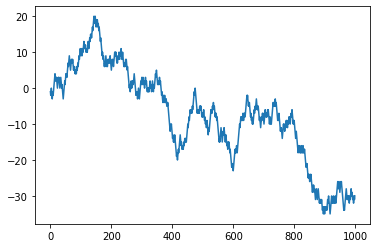

In [349]:
plt.plot(walk[:])